<a href="https://colab.research.google.com/github/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_vi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ipynb file here](https://github.com/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_vi.ipynb)

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import squarify as sq

EXAMINE THE
TRANSACTION DATA

In [3]:
# import and load the transaction dataset
transaction = pd.read_excel("/content/drive/MyDrive/Data/Quantium Forage/QVI_transaction_data.xlsx")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
# making and using a copy of the transaction dataset
df_transaction = transaction.copy()

In [5]:
# checking for null values in the transaction dataset
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

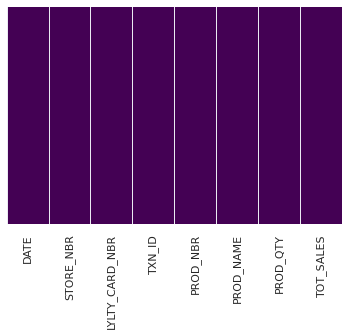

In [6]:
sns.heatmap(df_transaction.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [7]:
# checking how many rows and columns the dataset contains
df_transaction.shape

(264836, 8)

In [8]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
# checking if the columns have the correct datatypes
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [10]:
# checking the amount of unique values in each column
df_transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [11]:
# checking the amount of duplicate rows
df_transaction.duplicated(subset = None, keep = 'first').sum()


1

In [12]:
# we see that we have just one duplicated row
# then we can check the duplicated row
df_transaction[df_transaction.duplicated(subset = None, keep = 'first')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [13]:
# delete the duplicate rows
df_transaction.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [14]:
df_transaction
# looking at the dataframe now, the single duplicate row has been removed

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [15]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


EXAMINE THE CUSTOMER DATA

In [16]:
# # import and load the customer dataset
customer = pd.read_csv("/content/drive/MyDrive/Data/Quantium Forage/QVI_purchase_behaviour.csv")
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [17]:
df_customer = customer.copy()

In [18]:
# check for null values in the dataset
df_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

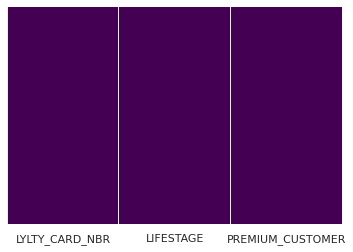

In [19]:
sns.heatmap(df_customer.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [20]:
# check the amount of row and column in the dataframe
df_customer.shape

(72637, 3)

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# checking if the columns have the correct datatypes
df_customer.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [23]:
# checking the amount of unique values in each column
df_customer.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [24]:
# checking the amount of duplicate rows in the dataframe
df_customer.duplicated(subset = None, keep = 'first').sum()
# we see that we have no duplicates in the dataset

0

In [25]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


MERGING THE DATASET

In [26]:
df_merged = pd.merge(df_transaction, df_customer, on='LYLTY_CARD_NBR', how='left')
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [27]:
df_chips = df_merged.copy()

In [28]:
# check for null values
df_chips.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

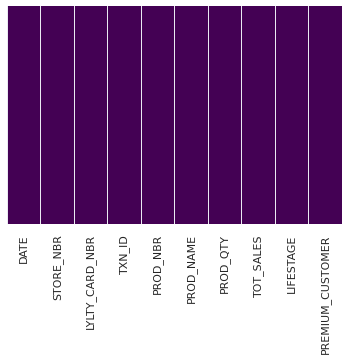

In [29]:
sns.heatmap(df_chips.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [30]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [31]:
# derive "PACK_SIZE" column using the "PROD_NAME" column
pack_sizes = []
for j in df_chips["PROD_NAME"]:
  if any(map(str.isdigit, j.split(" ")[-1])):
    size = j.split(" ")[-1][-4:-1]
    pack_sizes.append(size)
  else:
    size = j.split(" ")[1][:-1]
    pack_sizes.append(size)

pack_sizes_gr = [f"{each}g" for each in pack_sizes]

df_chips["PACK_SIZE"] = pack_sizes_gr

In [32]:
# derive Brand Name from Prod_name
len(df_chips["PROD_NAME"].value_counts().values)

114

In [33]:
df_chips["PROD_NAME"].value_counts().index

Index(['Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Cobs Popd Sea Salt  Chips 110g', 'Kettle 135g Swt Pot Sea Salt',
       'Tostitos Splash Of  Lime 175g',
       'Infuzions Thai SweetChili PotatoMix 110g',
       'Smiths Crnkle Chip  Orgnl Big Bag 380g',
       'Thins Potato Chips  Hot & Spicy 175g',
       ...
       'Thins Chips         Originl saltd 175g',
       'Smiths Chip Thinly  CutSalt/Vinegr175g',
       'Smiths Crinkle Cut  French OnionDip 150g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Sunbites Whlegrn    Crisps Frch/Onin 90g', 'RRD Pc Sea Salt     165g',
       'Woolworths Medium   Salsa 300g',
       'NCC Sour Cream &    Garden Chives 175g',
       'French Fries Potato Chips 175g', 'WW Crinkle Cut      Original 175g'],
      dtype='object', length=114)

In [34]:
df_chips["PROD_NAME"].value_counts().values

array([3304, 3296, 3269, 3268, 3265, 3257, 3252, 3242, 3233, 3229, 3219,
       3217, 3210, 3204, 3200, 3197, 3188, 3185, 3177, 3174, 3174, 3173,
       3172, 3170, 3169, 3167, 3162, 3160, 3159, 3159, 3157, 3149, 3148,
       3146, 3145, 3144, 3142, 3138, 3134, 3127, 3125, 3121, 3115, 3115,
       3114, 3114, 3114, 3105, 3104, 3103, 3095, 3085, 3083, 3083, 3074,
       3052, 3038, 1614, 1576, 1572, 1564, 1550, 1539, 1526, 1518, 1516,
       1516, 1514, 1513, 1512, 1509, 1507, 1506, 1503, 1498, 1498, 1495,
       1495, 1491, 1489, 1487, 1484, 1483, 1481, 1479, 1474, 1473, 1473,
       1472, 1470, 1469, 1468, 1468, 1467, 1461, 1461, 1460, 1458, 1455,
       1455, 1454, 1451, 1449, 1448, 1441, 1440, 1438, 1434, 1432, 1431,
       1430, 1419, 1418, 1410])

In [35]:
# derive "BRAND_NAME" column from the "PROD_NAME" column
df_chips["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [36]:
# Create a list of chip brand names
# looking at the dataset critically, we seem to have 21 unique Brand Names
chip_brands = ['Natural Chip CO.', 'Ccs', 'Smiths', 'Kettle', 'Old El Paso', 'Grain Waves', 'Doritos', 'Twisties', 'Thins', 'Burger Rings', 'Cheezels',
               'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Woolworths', 'Cobs', 'French Fries', 'Tostitos', 'Sunbites', 'Cheetos']
if len(set(chip_brands)) == len(chip_brands):
  print("Unique")

Unique


In [37]:
# actual creation of the BRAND_NAME column + cleaning

brand_list = []

for each in df_chips['PROD_NAME']:
  if each.split(" ")[0] == "Infzns":
    brand_list.append("Infuzions")
  elif each.split(" ")[0] == "GrnWves" or each.split(" ")[0] == "Grain":
    brand_list.append("Grain Waves")
  elif each.split(" ")[0] == "RRD" or each.split(" ")[0] == "Red":
    brand_list.append("Red Rock Deli")
  elif each.split(" ")[0] == "WW":
    brand_list.append("Woolworths")
  elif each.split(" ")[0] == "Snbts":
    brand_list.append("Sunbites")
  elif each.split(" ")[0] == "Natural":
    brand_list.append("Natural Chip Co")
  elif each.split(" ")[0] == "Burger":
    brand_list.append("Burger Rings")
  elif each.split(" ")[0] == "NCC":
    brand_list.append("Natural Chip Co")
  elif each.split(" ")[0] == "Old":
    brand_list.append("Old El Paso")
  elif each.split(" ")[0] == "French":
    brand_list.append("French Fries")
  elif each.split(" ")[0] == "Smith":
    brand_list.append("Smiths")
  elif each.split(" ")[0] == "Dorito":
    brand_list.append("Doritos")
  else:
    brand_list.append(each.split(" ")[0])

df_chips["BRAND_NAME"] = brand_list


In [38]:
df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos


In [39]:
df_chips['BRAND_NAME'].value_counts()

Kettle             41288
Smiths             31822
Doritos            28147
Pringles           25102
Red Rock Deli      17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old El Paso         9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
French Fries        1418
Name: BRAND_NAME, dtype: int64

In [40]:
# 21 total unique Brand names
len(df_chips['BRAND_NAME'].value_counts())

21

In [41]:
# we see that we have 2 outliers and the transaction was made by the same person
# Now we remove the outliers with the following steps

# df_chips.sort_values(by="TOT_SALES", ascending=False).head()

df_chips.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380g,Doritos
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380g,Doritos
204366,43327,223,223025,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5,YOUNG FAMILIES,Mainstream,170g,Smiths
55501,43602,164,164072,164241,36,Kettle Chilli 175g,5,27.0,OLDER FAMILIES,Mainstream,175g,Kettle
69815,43326,257,257208,257019,45,Smiths Thinly Cut Roast Chicken 175g,5,15.0,OLDER FAMILIES,Premium,175g,Smiths


In [42]:
df_chips.drop(df_chips[df_chips['PROD_QTY'] == 200].index, inplace = True)

In [43]:
df_chips = df_chips.reset_index()
df_chips

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths
3,3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths
4,4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle
264829,264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos
264830,264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos
264831,264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos


In [44]:
df_chips = df_chips.drop(['index'], axis=1)

In [45]:
# Change data format
from datetime import date, timedelta

start = date(1899, 12, 30)
format_new_date = []
for the_date in df_chips["DATE"]:
  the_delta = timedelta(the_date)
  format_new_date.append(start + the_delta)

In [46]:
df_chips["DATE"] = pd.to_datetime(pd.Series(format_new_date))

In [47]:
df_chips["DATE"].describe()

<ipython-input-47-032218fc437f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_chips["DATE"].describe()


count                  264833
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [48]:
# no transaction date
pd.date_range(start=df_chips["DATE"].min(), end=df_chips["DATE"].max()).difference(df_chips["DATE"])


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

OBSERVATION:
No transaction on the 25th of December(2018-12-25) and this seems the store was closed because it is christmas day

In [49]:
# create bins to represent each month of transaction
df_chips['DATE_BINS'] = pd.cut(df_chips['DATE'], bins=12, labels=('July 2018', 'August 2018', 'September 2018', 'October 2018', 'November 2018',
                                                                 'December 2018', 'January 2019', 'February 2019', 'March 2019', 'April 2019',
                                                                 'May 2019', 'June 2019'))

FINAL CLEANED DATASET

In [50]:
df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,DATE_BINS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,October 2018
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs,May 2019
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths,May 2019
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths,August 2018
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle,August 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle,March 2019
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos,August 2018
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos,November 2018
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos,December 2018


In [51]:
# save dataframe to a CSV file
#df_chips.to_csv('chips_trans.csv')

### **ANALYZING THE DATASET**










In [52]:
df_chips.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'PACK_SIZE', 'BRAND_NAME', 'DATE_BINS'],
      dtype='object')

In [53]:
df_chips.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,DATE_BINS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,October 2018


In [54]:
# total transaction per month
monthly_transaction = df_chips.groupby(['DATE_BINS']).size().reset_index().rename(columns={0:'TOTAL_TRANSACTIONS'})
monthly_transaction

,DATE_BINS,TOTAL_TRANSACTIONS
0,July 2018,22562
1,August 2018,21707
2,September 2018,22446
3,October 2018,21580
4,November 2018,21818
5,December 2018,22868
6,January 2019,21396
7,February 2019,21878
8,March 2019,22592
9,April 2019,21766


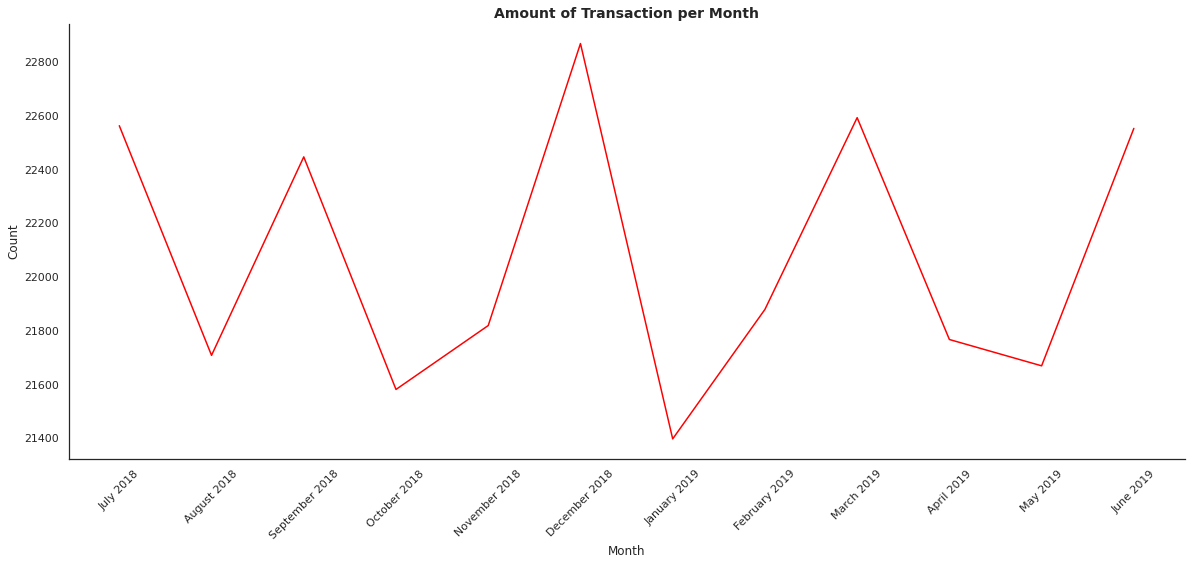

In [55]:
# line graph to show total transaction v total sales
sns.set_style("white")
plt.figure(figsize = (20, 8))
plt.plot(monthly_transaction["DATE_BINS"], monthly_transaction["TOTAL_TRANSACTIONS"], color = "red")
plt.xticks(rotation = 45)
plt.title("Amount of Transaction per Month", fontsize = 14, fontweight = 'bold')
sns.despine(top='True', right='True')
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

OBSERVATION:
December 2018 was the month with the highest amount of transaction followed by 'March 2019' and 'July 2018'

In [56]:
# amount store made from sales per month
monthly_sales = df_chips.groupby(['DATE_BINS'])["TOT_SALES"].sum().reset_index()
monthly_sales

,DATE_BINS,TOT_SALES
0,July 2018,165275.30
1,August 2018,152870.15
2,September 2018,165732.90
3,October 2018,159243.80
4,November 2018,159903.20
5,December 2018,168044.20
6,January 2019,157254.80
7,February 2019,161418.10
8,March 2019,166265.20
9,April 2019,159845.10


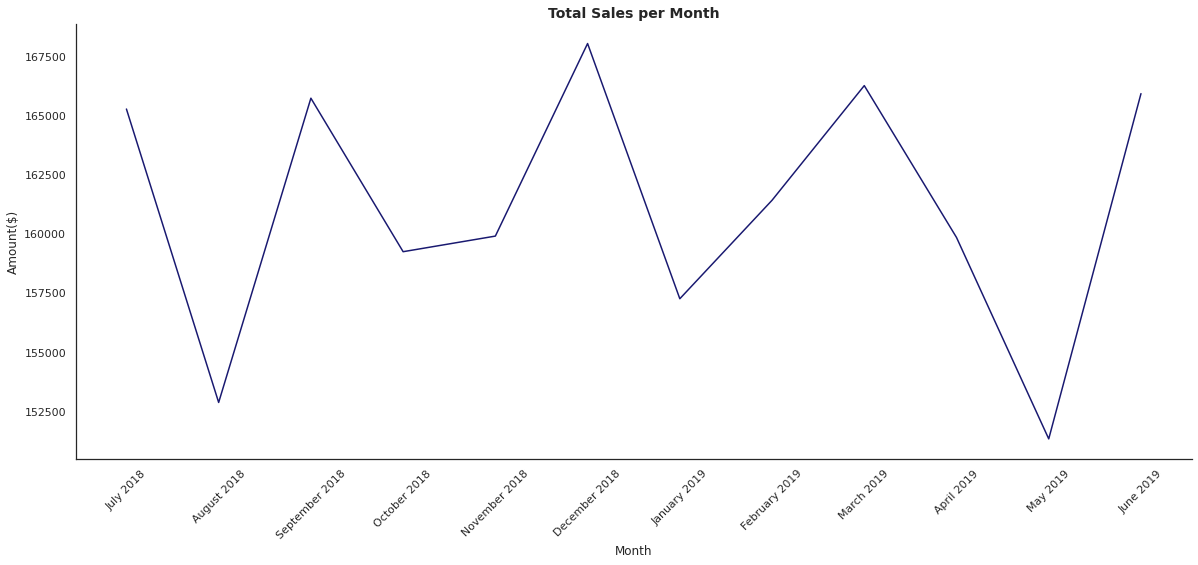

In [57]:
# line graph to show total transaction v total sales
sns.set_style("white")
plt.figure(figsize = (20, 8))
plt.plot(monthly_sales["DATE_BINS"], monthly_sales["TOT_SALES"], color = "midnightblue")
plt.xticks(rotation = 45)
plt.title("Total Sales per Month", fontsize = 14, fontweight = 'bold')
sns.despine(top='True', right='True')
plt.ylabel("Amount($)")
plt.xlabel("Month")
plt.show()

OBSERVATION:
December 2018 was the month with the highest amount of sales -> \$168,044.20 followed by

*   March 2019 with \$166,265.20 in sales
*   June 2019	with \$165,926.00 in sales



In [58]:
# getting a dataframe that contains each unique packsize and total amount sold
chips_packs_sold = df_chips.groupby(['PACK_SIZE'])['PROD_QTY'].sum().reset_index()
chips_packs_sold

,PACK_SIZE,PROD_QTY
0,110g,42835
1,125g,2730
2,134g,48019
3,135g,6212
4,150g,82174
5,160g,5604
6,165g,29051
7,170g,38088
8,175g,126465
9,180g,2764


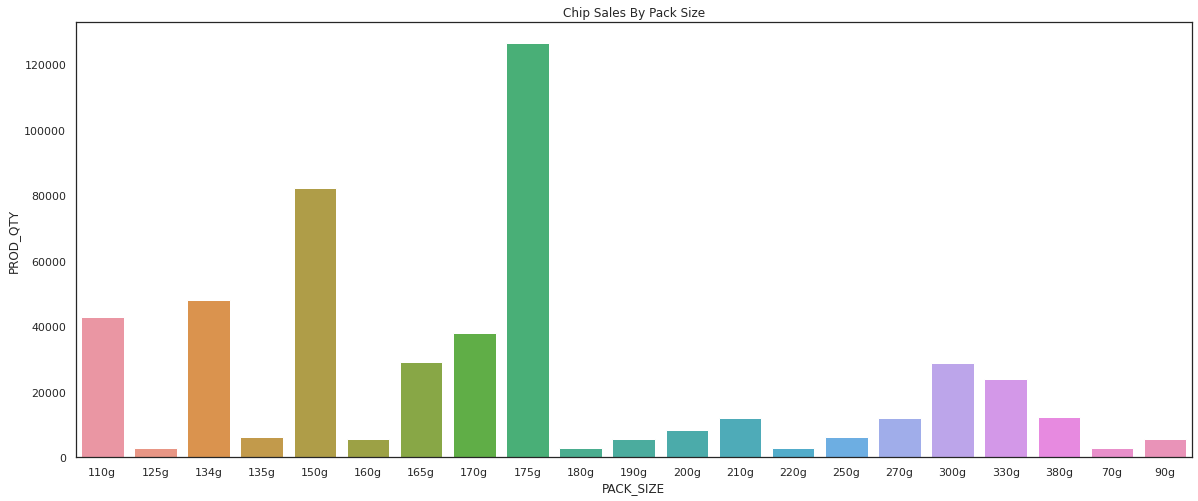

In [59]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x="PACK_SIZE", y='PROD_QTY', data=chips_packs_sold).set(title='Chip Sales By Pack Size')
plt.show()

OBSERVATION:
We observe from above that chips of pack size 175g were the highest bought by customers with over 126000 packs sold. Followed by chips of pack size 150g, 134g, 110g and 170g

In [60]:
brand_sales = df_chips.groupby(['BRAND_NAME'])['TOT_SALES'].sum().reset_index()
brand_sales = brand_sales.sort_values(by="TOT_SALES", ascending=False)
brand_sales = brand_sales.reset_index()
brand_sales.drop(labels='index', axis=1, inplace=True)
brand_sales

,BRAND_NAME,TOT_SALES
0,Kettle,390239.8
1,Doritos,240590.9
2,Smiths,224654.2
3,Pringles,177655.5
4,Infuzions,99047.6
5,Red Rock Deli,95046.0
6,Old El Paso,90785.1
7,Thins,88852.5
8,Twisties,81522.1
9,Tostitos,79789.6


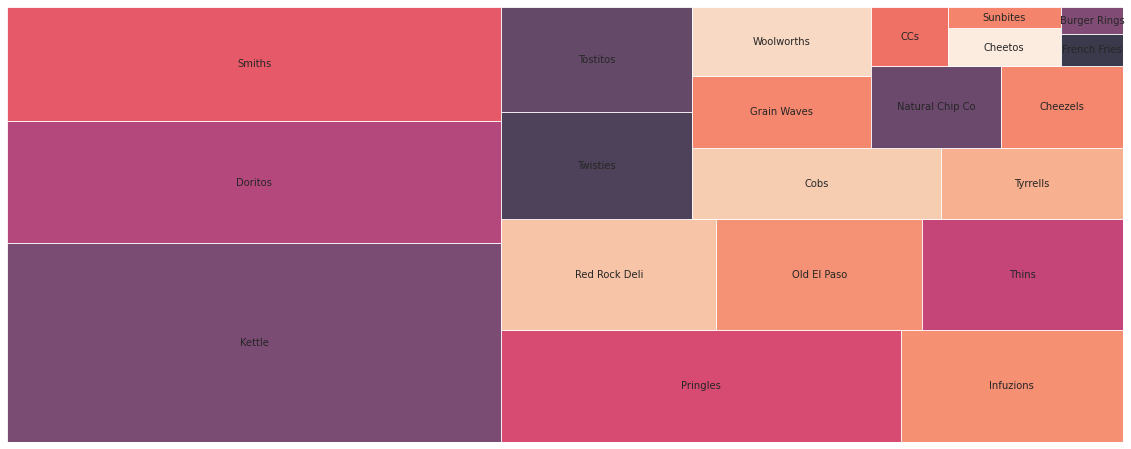

In [61]:
sq.plot(sizes=brand_sales['TOT_SALES'], label=brand_sales['BRAND_NAME'], alpha=.8)
plt.axis('off')
plt.show()

OBSERVATION:
We observe from the Treemap that the chips brand "Kettle" brought in the most amount of money for the store within the time period, followed by Doritos, Smiths, Pringles and Infuzions.

In [62]:
chips_purchase = df_chips['BRAND_NAME'].value_counts().reset_index().rename(columns={'index':'BRAND_NAME', 'BRAND_NAME':'PURCHASE_COUNT'})
chips_purchase

,BRAND_NAME,PURCHASE_COUNT
0,Kettle,41288
1,Smiths,31822
2,Doritos,28145
3,Pringles,25102
4,Red Rock Deli,17779
5,Woolworths,14757
6,Infuzions,14201
7,Thins,14075
8,Cobs,9693
9,Tostitos,9471


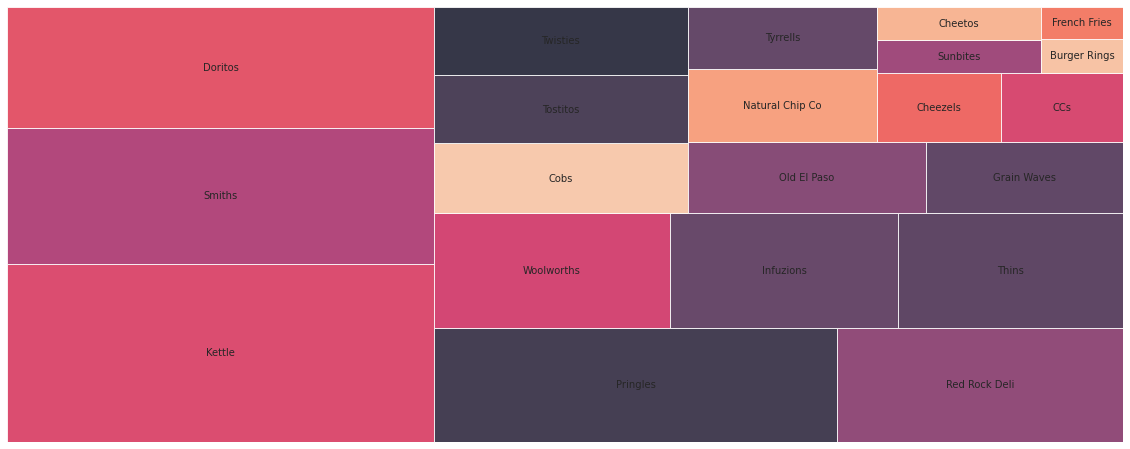

In [63]:
sq.plot(sizes=chips_purchase['PURCHASE_COUNT'], label=chips_purchase['BRAND_NAME'], alpha=.8)
plt.axis('off')
plt.show()

OBSERVATION:
We observe from the Treemap that the chips brand "Kettle" was the most purchased brand, followed by Smiths and Doritos brand.

In [64]:
df_customer_type = df_chips.groupby(['PREMIUM_CUSTOMER'])["TOT_SALES"].sum().reset_index()
df_customer_type

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506152.95


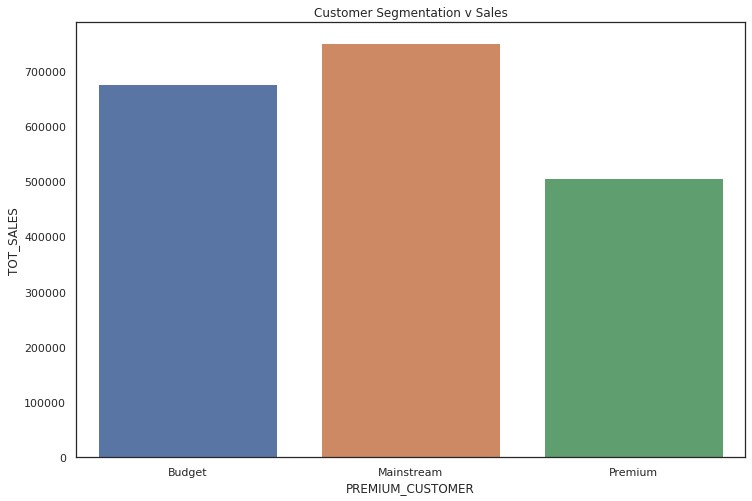

In [65]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(x="PREMIUM_CUSTOMER", y='TOT_SALES', data=df_customer_type).set(title='Customer Segmentation v Sales')
plt.show()

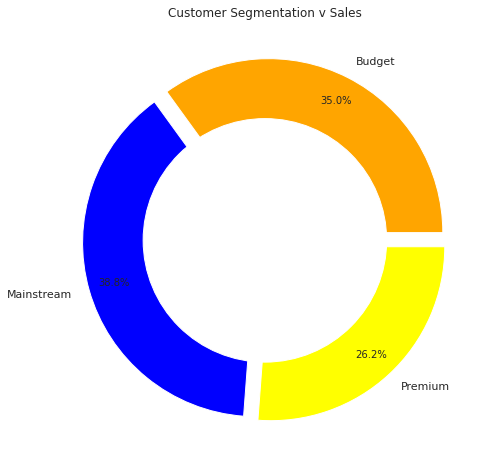

In [66]:
# Doughnut Chart of Customer Segmentation
colors = ['#FFA500', '#0000FF', '#FFFF00']
# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(df_customer_type['TOT_SALES'], colors=colors, labels=df_customer_type['PREMIUM_CUSTOMER'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Customer Segmentation v Sales')
plt.show()

OBSERVATION:
From the above Bar chart and Doughnut chart, we see that Mainstream customers spent over \$700,000(38.8%) in the store followed by the Budget customers with over \$670,000(35%) and Premium customers with over \$500,000(26.2%)

In [67]:
# Lifestage vs total_sales
df_lifestage = df_chips.groupby(['LIFESTAGE'])["TOT_SALES"].sum().reset_index()
df_lifestage

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352467.20
3,OLDER SINGLES/COUPLES,402420.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


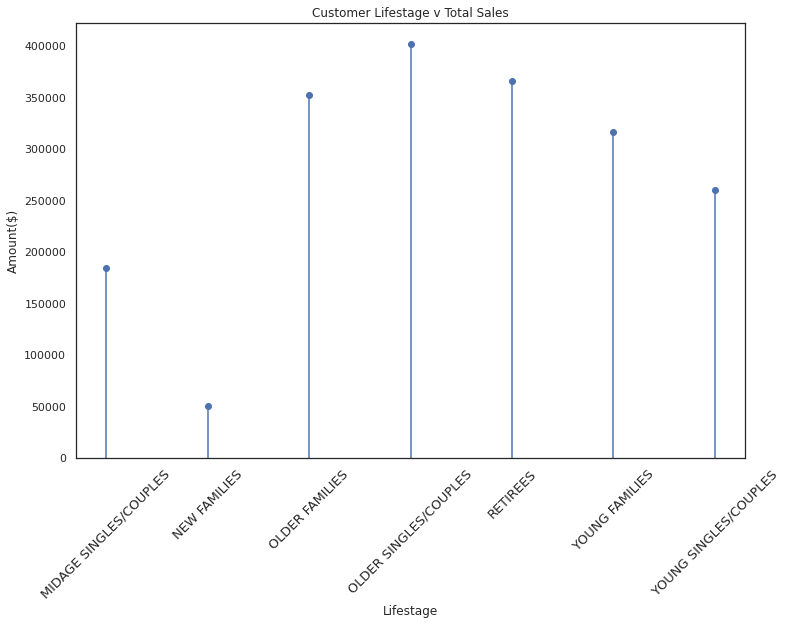

In [68]:
fig, axes = plt.subplots()

# using plt.stem
axes.stem(df_lifestage['LIFESTAGE'], df_lifestage['TOT_SALES'],
          use_line_collection=True, basefmt=' ')
  
# starting value of y-axis
axes.set_ylim(0)
  
# details and formatting of chart
plt.title('Customer Lifestage v Total Sales')
plt.xlabel('Lifestage')
plt.ylabel('Amount($)')
plt.xticks(df_lifestage['LIFESTAGE'], rotation = 45, fontsize= 13)
plt.show()

OBSERVATIONS:
From the above chart, we see that:

*   OLDER SINGLES/COUPLES	spent the most with \$402,420.75
*   RETIREES	spent \$366,470.90 as the second highest spenders
*   OLDER FAMILIES spent	\$352,467.20 as the third highest spenders

  While NEW FAMILIES spent the least with \$50,433.45

1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
2. How many customers are in each segment
3. How many chips are bought per customer by segment
4. What's the average chip price by customer segment

In [69]:
# LIFESTAGE, PREMIUM_CUSTOMER vs TOTAL_SALES(sum)
customer_sales = df_chips.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).reset_index()
customer_sales

,LIFESTAGE,PREMIUM_CUSTOMER,sum,mean
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,7.112056
3,NEW FAMILIES,Budget,21928.45,7.297321
4,NEW FAMILIES,Mainstream,17013.90,7.317806
5,NEW FAMILIES,Premium,11491.10,7.231655
6,OLDER FAMILIES,Budget,168363.25,7.269570
7,OLDER FAMILIES,Mainstream,103445.55,7.262395
8,OLDER FAMILIES,Premium,80658.40,7.208079
9,OLDER SINGLES/COUPLES,Budget,136769.80,7.430315


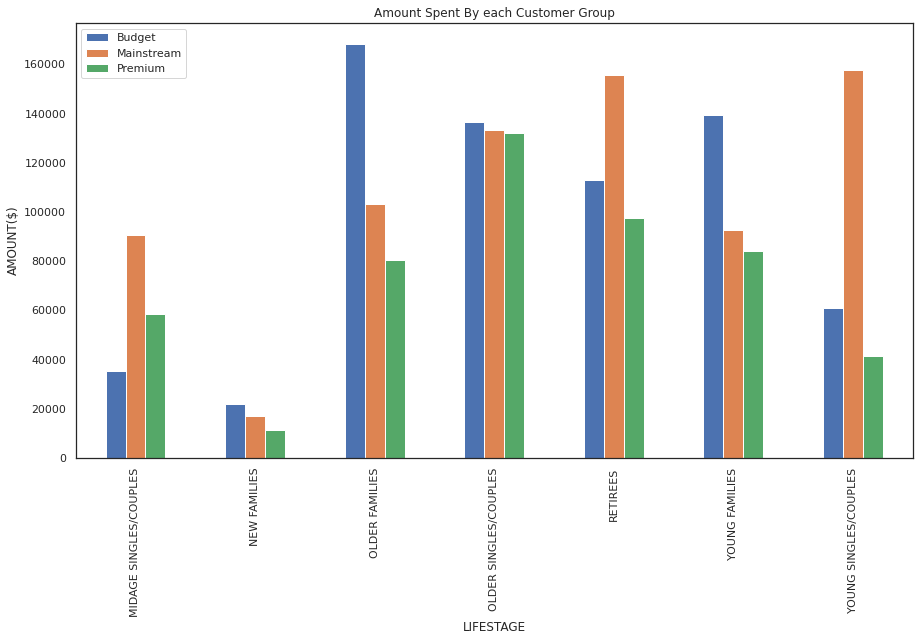

In [70]:
# pivot the dataframe and plot graph
customer_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='sum').plot(kind='bar', figsize=(15, 8))
plt.xlabel('LIFESTAGE')
plt.ylabel('AMOUNT($)')
plt.title('Amount Spent By each Customer Group')
plt.legend(loc='upper left')
plt.show()

OBSERVATION:
From the grouped bar chart above we observe the top 5 groups that spend most on chips:

1.   OLDER FAMILIES - Budget
2.   YOUNG SINGLES/COUPLES - Mainstream
3.   RETIREES - Mainstream
4.   YOUNG FAMILIES - Budget
5.   OLDER SINGLES/COUPLES	- Budget





In [71]:
customers_unique = df_chips.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False).reset_index()
customers_unique

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,YOUNG SINGLES/COUPLES,Mainstream,8088
1,RETIREES,Mainstream,6479
2,OLDER SINGLES/COUPLES,Mainstream,4930
3,OLDER SINGLES/COUPLES,Budget,4929
4,OLDER SINGLES/COUPLES,Premium,4750
5,OLDER FAMILIES,Budget,4675
6,RETIREES,Budget,4454
7,YOUNG FAMILIES,Budget,4017
8,RETIREES,Premium,3872
9,YOUNG SINGLES/COUPLES,Budget,3779


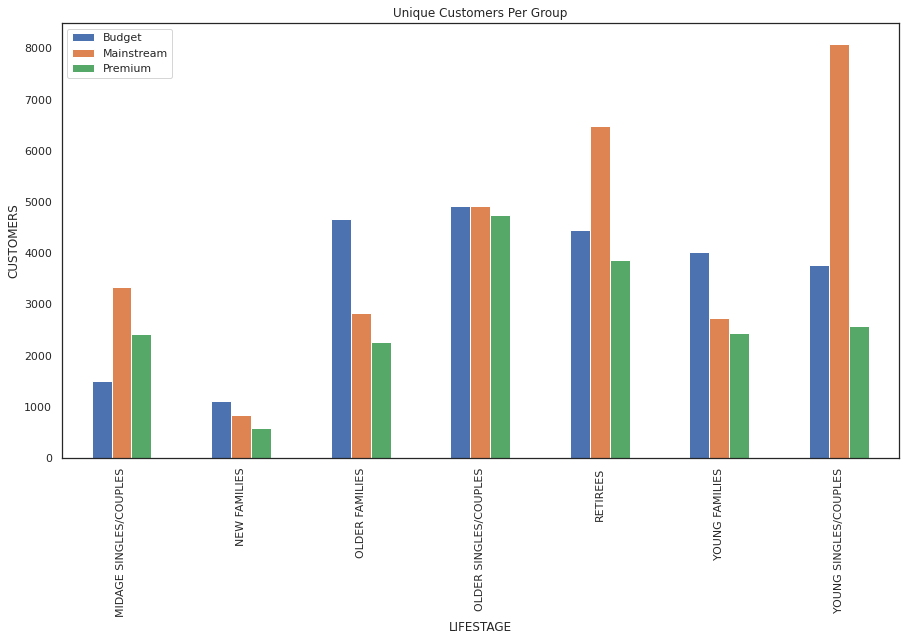

In [72]:
customers_unique.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR').plot(kind='bar', figsize=(15, 8))
plt.xlabel('LIFESTAGE')
plt.ylabel('CUSTOMERS')
plt.title('Unique Customers Per Group')
plt.legend(loc='upper left')
plt.show()

OBSERVATION:
Using the grouped bar chart above we observe the top 5 groups with the most customers:

1.   YOUNG SINGLES/COUPLES	- Mainstream with 8088 unique customers 
2.   RETIREES	- Mainstream with 6479 unique customers
3.   OLDER SINGLES/COUPLES	- Mainstream with 4930 unique customers
4.   OLDER SINGLES/COUPLES	- Budget	with 4929 unique customers
5.   OLDER SINGLES/COUPLES	- Premium	with 4750 unique customers

OBSERVATION
We observe that:
Customers in groups (a)YOUNG SINGLES/COUPLES - Mainstream and (b)Retirees - Mainstream have the highest unique customers and hence they also have the highest purchase of chips